# Overview of this jupyter notebook

1. Load the dataframes
<br>1.1 Padding dataframes with zeros
<br>1.2 Shuffle and split the data into train and test
2. Preprocess training data
<br>2.1 Build feature and label for training and save as .npy
3. Preprocess test data
<br>3.1 Build feature and label for test and save as .npy

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
import json
import random
import pickle
import importlib
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
print(importlib.reload(fapsc))

<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>


# 1. Load the dataframes

In [3]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [4]:
df0 = pd.read_pickle("dataframes/df0_v2.pkl")
df1 = pd.read_pickle("dataframes/df1_v2.pkl")
df2 = pd.read_pickle("dataframes/df2_v2.pkl")
df3 = pd.read_pickle("dataframes/df3_v2.pkl")
df4 = pd.read_pickle("dataframes/df4_v2.pkl")
df5 = pd.read_pickle("dataframes/df5_v2.pkl")
df6 = pd.read_pickle("dataframes/df6_v2.pkl")
df7 = pd.read_pickle("dataframes/df7_v2.pkl")

In [5]:
df16 = pd.read_pickle("dataframes/df16_v2.pkl")
df24 = pd.read_pickle("dataframes/df24_v2.pkl")
df27 = pd.read_pickle("dataframes/df27_v2.pkl")
df35 = pd.read_pickle("dataframes/df35_v2.pkl")
df37 = pd.read_pickle("dataframes/df37_v2.pkl")
df267 = pd.read_pickle("dataframes/df267_v2.pkl")
df357 = pd.read_pickle("dataframes/df357_v2.pkl")

In [6]:
df0.shape

(775, 800)

In [7]:
df0

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.38080,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20160,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [8]:
dfs = {"df0":df0, "df1":df1, "df2":df2, "df3":df3, "df4":df4, "df5":df5, "df6":df6, "df7":df7,
       "df16":df16, "df24":df24, "df27":df27, "df35":df35, "df37":df37, "df267":df267, "df357":df357}

In [9]:
for i in dfs:
    print(f"length of {i}: {len(dfs[i])}")

length of df0: 775
length of df1: 931
length of df2: 812
length of df3: 697
length of df4: 803
length of df5: 766
length of df6: 743
length of df7: 748
length of df16: 877
length of df24: 816
length of df27: 774
length of df35: 728
length of df37: 716
length of df267: 778
length of df357: 729


In [10]:
tot_nr_curves = []

for i in dfs:
    print(f"{i} number of curves: {len(dfs[i].columns)}")
    tot_nr_curves.append(len(dfs[i].columns))
    
print(f"tot_nr_curves: {sum(tot_nr_curves)}")

df0 number of curves: 800
df1 number of curves: 200
df2 number of curves: 200
df3 number of curves: 200
df4 number of curves: 200
df5 number of curves: 200
df6 number of curves: 200
df7 number of curves: 200
df16 number of curves: 100
df24 number of curves: 100
df27 number of curves: 100
df35 number of curves: 100
df37 number of curves: 100
df267 number of curves: 100
df357 number of curves: 100
tot_nr_curves: 2900


In [11]:
tot_nr_curves

[800, 200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100]

## 1.1 Padding dataframes with zeros

In [12]:
def zero_padding(df, len_curve):
    
    to_pad = len_curve - len(df)
    zeros = np.zeros(to_pad*len(df.columns)).reshape(to_pad, len(df.columns))
    df_zeros = pd.DataFrame(zeros)    
    df_padded = df.append(df_zeros)
    df_padded = df_padded.reset_index(drop=True)
    
    return df_padded

In [13]:
def pad_df(df, len_curve=920):
    
    if len(df)>len_curve:
        print(f"this dataframe has a length of {len(df)}")
    else:
        df_padded = zero_padding(df, len_curve)
        print(df_padded.shape)
        return df_padded

In [14]:
df0p = pad_df(df0)
df1p = df1[:920]
df2p = pad_df(df2)
df3p = pad_df(df3)
df4p = pad_df(df4)
df5p = pad_df(df5)
df6p = pad_df(df6)
df7p = pad_df(df7)

df1p.shape

(920, 800)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)


(920, 200)

In [15]:
df16p = pad_df(df16)
df24p = pad_df(df24)
df27p = pad_df(df27)
df35p = pad_df(df35)
df37p = pad_df(df37)
df267p = pad_df(df267)
df357p = pad_df(df357)

(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)


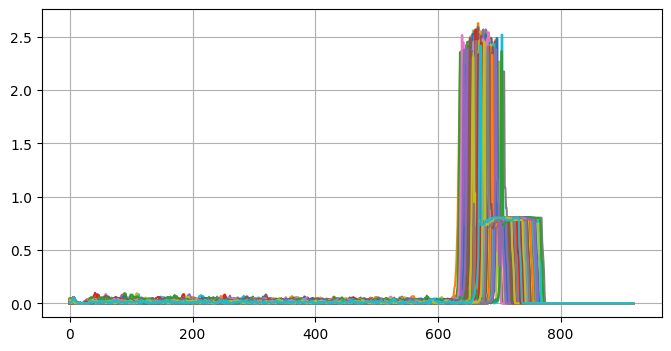

In [16]:
plt.figure(figsize=(8,4))
plt.plot(df0p)
plt.grid()
plt.show()

In [17]:
df0p

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## 1.2 Shuffle and split the data -> test size: 50 curves each class

In [18]:
def split_df(df):
    
    feature = df.values.transpose()
    x_train, x_test = train_test_split(feature, random_state=9, test_size=50, shuffle=True)
    
    return x_train, x_test

In [19]:
cl0train, cl0test = split_df(df0p)
cl1train, cl1test = split_df(df1p)
cl2train, cl2test = split_df(df2p)
cl3train, cl3test = split_df(df3p)
cl4train, cl4test = split_df(df4p)
cl5train, cl5test = split_df(df5p)
cl6train, cl6test = split_df(df6p)
cl7train, cl7test = split_df(df7p)

In [20]:
cl16train, cl16test = split_df(df16p)
cl24train, cl24test = split_df(df24p)
cl27train, cl27test = split_df(df27p)
cl35train, cl35test = split_df(df35p)
cl37train, cl37test = split_df(df37p)
cl267train, cl267test = split_df(df267p)
cl357train, cl357test = split_df(df357p)

In [21]:
train_list = [cl0train, cl1train, cl2train, cl3train, cl4train, cl5train, cl6train, cl7train, 
              cl16train, cl24train, cl27train, cl35train, cl37train, cl267train, cl357train]

In [27]:
train_nr_curves = []

for i in train_list:
    train_nr_curves.append(len(i))
    
print(train_nr_curves)

[750, 150, 150, 150, 150, 150, 150, 150, 50, 50, 50, 50, 50, 50, 50]


In [29]:
np.save("feature_label/occ_autoencoder_train_sector_v2.4.npy", np.cumsum(train_nr_curves))
np.cumsum(train_nr_curves)

array([ 750,  900, 1050, 1200, 1350, 1500, 1650, 1800, 1850, 1900, 1950,
       2000, 2050, 2100, 2150], dtype=int32)

In [31]:
cl0train.shape, cl1train.shape, cl357train.shape

((750, 920), (150, 920), (50, 920))

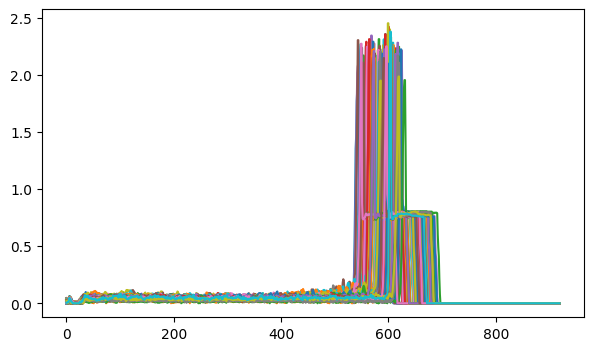

In [26]:
plt.figure(figsize=(7,4))
plt.plot(cl3train.transpose())
plt.show()

# 2. Preprocess training data

## 2.1 Build feature and label for training and save as .npy

In [32]:
feature_train = np.concatenate((cl0train, cl1train, cl2train, cl3train, cl4train,
                                cl5train, cl6train, cl7train, 
                                cl16train, cl24train, cl27train, cl35train, cl37train,
                                cl267train, cl357train), axis=0)
feature_train.shape

(2150, 920)

In [33]:
def build_multi_label(shape_list, p0=None, p1=None, p2=None):
    
    label = np.zeros(shape_list[0]*shape_list[1]).reshape(shape_list[0], shape_list[1])
    
    if p0 is not None:
        label[:, p0] = 1
    if p1 is not None:
        label[:, p1] = 1
    if p2 is not None:
        label[:, p2] = 1
    
    return label

In [34]:
class_amount =8
l0train = build_multi_label(shape_list=[cl0train.shape[0],class_amount], p0=0)
l1train = build_multi_label(shape_list=[cl1train.shape[0],class_amount], p0=1)
l2train = build_multi_label(shape_list=[cl2train.shape[0],class_amount], p0=2)
l3train = build_multi_label(shape_list=[cl3train.shape[0],class_amount], p0=3)
l4train = build_multi_label(shape_list=[cl4train.shape[0],class_amount], p0=4)
l5train = build_multi_label(shape_list=[cl5train.shape[0],class_amount], p0=5)
l6train = build_multi_label(shape_list=[cl6train.shape[0],class_amount], p0=6)
l7train = build_multi_label(shape_list=[cl7train.shape[0],class_amount], p0=7)

l16train = build_multi_label(shape_list=[cl16train.shape[0],class_amount], p0=1, p1=6)
l24train = build_multi_label(shape_list=[cl24train.shape[0],class_amount], p0=2, p1=4)
l27train = build_multi_label(shape_list=[cl27train.shape[0],class_amount], p0=2, p1=7)
l35train = build_multi_label(shape_list=[cl35train.shape[0],class_amount], p0=3, p1=5)
l37train = build_multi_label(shape_list=[cl37train.shape[0],class_amount], p0=3, p1=7)
l267train = build_multi_label(shape_list=[cl267train.shape[0],class_amount], p0=2, p1=6, p2=7)
l357train = build_multi_label(shape_list=[cl357train.shape[0],class_amount], p0=3, p1=5, p2=7)

In [35]:
l267train[0]

array([0., 0., 1., 0., 0., 0., 1., 1.])

In [36]:
label_train = np.concatenate((l0train, l1train, l2train, l3train, l4train, l5train, l6train, l7train,
                              l16train, l24train, l27train, l35train, l37train,
                              l267train, l357train), axis=0)
label_train.shape

(2150, 8)

In [37]:
np.save("feature_label/occ_feature_train_v2.4.npy", feature_train)

In [38]:
np.save("feature_label/occ_feature_test_v2.4.npy", label_train)

# 3. Preprocess test data

## 3.1 Build feature and label for test and save as .npy

In [39]:
feature_test = np.concatenate((cl0test, cl1test, cl2test, cl3test, cl4test,
                               cl5test, cl6test, cl7test, 
                               cl16test, cl24test, cl27test, cl35test, cl37test,
                               cl267test, cl357test), axis=0)
feature_test.shape

(750, 920)

In [40]:
l0test = build_multi_label(shape_list=[50,8], p0=0)
l1test = build_multi_label(shape_list=[50,8], p0=1)
l2test = build_multi_label(shape_list=[50,8], p0=2)
l3test = build_multi_label(shape_list=[50,8], p0=3)
l4test = build_multi_label(shape_list=[50,8], p0=4)
l5test = build_multi_label(shape_list=[50,8], p0=5)
l6test = build_multi_label(shape_list=[50,8], p0=6)
l7test = build_multi_label(shape_list=[50,8], p0=7)

l16test = build_multi_label(shape_list=[50,8], p0=1, p1=6)
l24test = build_multi_label(shape_list=[50,8], p0=2, p1=4)
l27test = build_multi_label(shape_list=[50,8], p0=2, p1=7)
l35test = build_multi_label(shape_list=[50,8], p0=3, p1=5)
l37test = build_multi_label(shape_list=[50,8], p0=3, p1=7)
l267test = build_multi_label(shape_list=[50,8], p0=2, p1=6, p2=7)
l357test = build_multi_label(shape_list=[50,8], p0=3, p1=5, p2=7)

In [41]:
label_test = np.concatenate((l0test, l1test, l2test, l3test, l4test, l5test, l6test, l7test,
                             l16test, l24test, l27test, l35test, l37test,
                             l267test, l357test), axis=0)
label_test.shape

(750, 8)

In [42]:
np.save("feature_label/occ_label_train_v2.4.npy", feature_test)

In [43]:
np.save("feature_label/occ_label_test_v2.4.npy", label_test)